 ### Import Necessary Libraries

In [283]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats

In [284]:
import warnings
warnings.filterwarnings('ignore')

### Read the data as dataframe

In [285]:
cardata = pd.read_csv("cars-dataset.csv")

### Perform Basic EDA

#### Shape of data

In [286]:
cardata.shape

(398, 8)

#### Display top 10 records

In [287]:
cardata.head(10)

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150,3433,12.0,70,16.0
4,ford torino,8,302.0,140,3449,10.5,70,17.0
5,ford galaxie 500,8,429.0,198,4341,10.0,70,15.0
6,chevrolet impala,8,454.0,220,4354,9.0,70,14.0
7,plymouth fury iii,8,440.0,215,4312,8.5,70,14.0
8,pontiac catalina,8,455.0,225,4425,10.0,70,14.0
9,amc ambassador dpl,8,390.0,190,3850,8.5,70,15.0


### Checking missing values

In [288]:
cardata.isnull().sum()

car name    0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
mpg         0
dtype: int64

### Attributes information

In [289]:
cardata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


In [ ]:
### We check why hp is an object and not a float.Let's look at the unique elements of hp to look for discrepancies 

In [290]:
cardata.hp.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [ ]:
### We find that there is '?' which is used as a placeholder for missing values. Lest remove these entries.

In [291]:
cardata = cardata[cardata.hp != '?']

In [292]:
cardata.shape

(392, 8)

In [293]:
cardata.dtypes

car name     object
cyl           int64
disp        float64
hp           object
wt            int64
acc         float64
yr            int64
mpg         float64
dtype: object

In [ ]:
# We see the hp data is still an object type and not float. So lets change this datatype

In [294]:
cardata.hp = cardata.hp.astype('float')
cardata.dtypes

car name     object
cyl           int64
disp        float64
hp          float64
wt            int64
acc         float64
yr            int64
mpg         float64
dtype: object

### 5 point summary

In [295]:
cardata.describe().transpose() 

,count,mean,std,min,25%,50%,75%,max
cyl,392.0,5.471939,1.705783,3.0,4.000,4.00,8.000,8.0
disp,392.0,194.411990,104.644004,68.0,105.000,151.00,275.750,455.0
hp,392.0,104.469388,38.491160,46.0,75.000,93.50,126.000,230.0
wt,392.0,2977.584184,849.402560,1613.0,2225.250,2803.50,3614.750,5140.0
acc,392.0,15.541327,2.758864,8.0,13.775,15.50,17.025,24.8
yr,392.0,75.979592,3.683737,70.0,73.000,76.00,79.000,82.0
mpg,392.0,23.445918,7.805007,9.0,17.000,22.75,29.000,46.6


### Standardize data

In [296]:
data1 = cardata.drop(columns = 'car name',axis = 1 )

In [297]:
data1.shape

(392, 7)

In [298]:
# standardizing the data
from sklearn.preprocessing import normalize
data_scaled = normalize(data1)
X = pd.DataFrame(data_scaled, columns=data1.columns)
X.head()

,cyl,disp,hp,wt,acc,yr,mpg
0,0.002272,0.087201,0.036926,0.995286,0.003409,0.019883,0.005113
1,0.002154,0.094240,0.044427,0.994364,0.003096,0.018848,0.004039
2,0.002316,0.092048,0.043419,0.994580,0.003184,0.020262,0.005210
3,0.002319,0.088104,0.043472,0.994936,0.003478,0.020287,0.004637
4,0.002308,0.087137,0.040395,0.995153,0.003030,0.020197,0.004905


## Check Data distributions

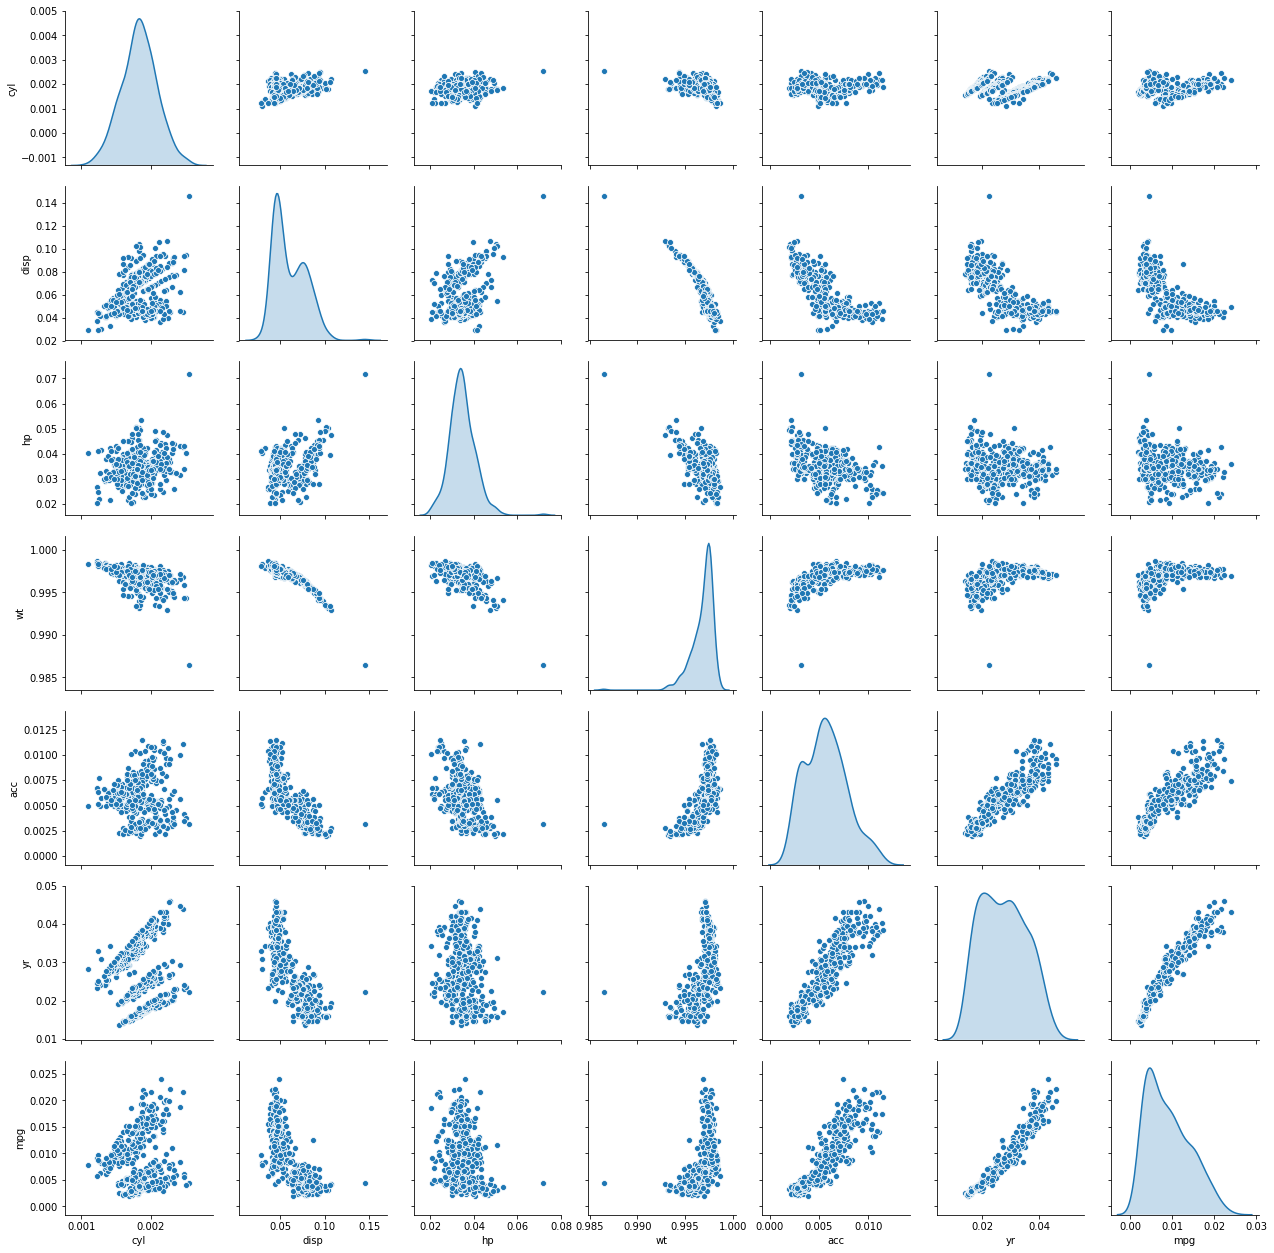

In [299]:
sns.pairplot(X,diag_kind="kde")

### Observation
### It seems there can be 1 to 3 clusters on visual checking pair plot of different attributes

In [205]:
# from pandas.plotting import scatter_matrix
# fig, axes = plt.subplots(figsize=(20,14))
# scatter_matrix(X, ax = axes)

### Find correlation between variables and Display heatmap

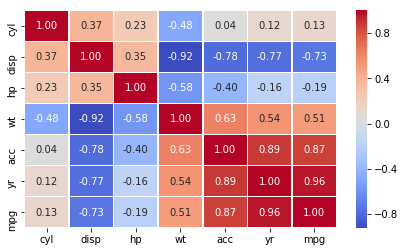

In [300]:
fig, axes = plt.subplots(figsize=(7,4))
# Generate Heat Map, allow annotations and place floats in map
sns.heatmap(data=X.corr(), cmap='coolwarm', annot=True, fmt = ".2f", linewidths=.5, ax=axes)
plt.show()

### Observation
#### Variables wt,acc,yr are highly correlated with mpg
#### Variable disp is also highly correlated with mpg (inversely proportional)

### K - Means Clustering

In [ ]:
# Since this is UnSupervised learning, output variable Y (mpg in this case) is not provided for clustering
# Dropping mpg column from Dataset (X)

In [301]:
data = X.drop(columns = 'mpg',axis = 1 )

In [302]:
data.shape

(392, 6)

In [303]:
data.head()

,cyl,disp,hp,wt,acc,yr
0,0.002272,0.087201,0.036926,0.995286,0.003409,0.019883
1,0.002154,0.094240,0.044427,0.994364,0.003096,0.018848
2,0.002316,0.092048,0.043419,0.994580,0.003184,0.020262
3,0.002319,0.088104,0.043472,0.994936,0.003478,0.020287
4,0.002308,0.087137,0.040395,0.995153,0.003030,0.020197


### Check optimal number of clusters

In [304]:
# KMeans Clustring Algorithm
# Label, Intertia and Centroid
from sklearn.cluster import KMeans
cluster_range = range(1, 11)   # expect 2 to 4 clusters from the pair plot visual inspection hence restricting from 1 to 10
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans(num_clusters, init='k-means++')
  clusters.fit(data)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_errors.append( clusters.inertia_ )    # capture the intertia

In [305]:
# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors} )
clusters_df[0:11]

,num_clusters,cluster_errors
0,1,0.164484
1,2,0.052167
2,3,0.035861
3,4,0.029877
4,5,0.024861
5,6,0.021491
6,7,0.018305
7,8,0.016634
8,9,0.014785
9,10,0.013728


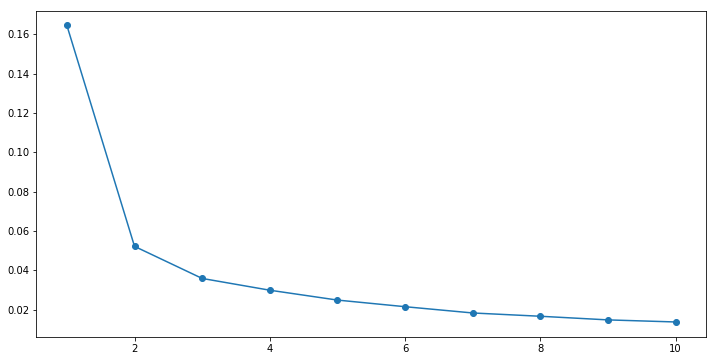

In [306]:
# Elbow plot
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

### Find out the optimal value of K

#### Optimal value of K = 2

### Finalize model Using optimal value of K - Cluster

In [307]:
# Number of clusters

kmeans = KMeans(n_clusters=2,init='k-means++')

# Fitting the input data

kmeans = kmeans.fit(data)

# Getting the cluster labels

labels = kmeans.predict(data)

# Centroid values

centroids = kmeans.cluster_centers_

# Comparing with scikit-learn centroids

print("Centroid values")

print("sklearn")

print(centroids) # From sci-kit learn

Centroid values
sklearn
[[0.00192262 0.07902108 0.03539903 0.99592409 0.00393087 0.02019898]
 [0.00177265 0.04764568 0.03420522 0.99756487 0.00709821 0.03322469]]


### Store the centroids in a dataframe with column names from the original dataset given

In [308]:
centroid_df = pd.DataFrame(centroids, columns=data.columns)
centroid_df.head()

,cyl,disp,hp,wt,acc,yr
0,0.001923,0.079021,0.035399,0.995924,0.003931,0.020199
1,0.001773,0.047646,0.034205,0.997565,0.007098,0.033225


In [309]:
X_df = pd.DataFrame(data)
X_df["group"] = labels
X_df.head(10)

,cyl,disp,hp,wt,acc,yr,group
0,0.002272,0.087201,0.036926,0.995286,0.003409,0.019883,0
1,0.002154,0.094240,0.044427,0.994364,0.003096,0.018848,0
2,0.002316,0.092048,0.043419,0.994580,0.003184,0.020262,0
3,0.002319,0.088104,0.043472,0.994936,0.003478,0.020287,0
4,0.002308,0.087137,0.040395,0.995153,0.003030,0.020197,0
5,0.001832,0.098231,0.045338,0.993991,0.002290,0.016028,0
6,0.001825,0.103565,0.050186,0.993219,0.002053,0.015968,0
7,0.001843,0.101375,0.049535,0.993475,0.001958,0.016128,0
8,0.001796,0.102141,0.050509,0.993353,0.002245,0.015714,0
9,0.002064,0.100644,0.049032,0.993537,0.002194,0.018064,0


In [310]:
# Count the number of records per group to check the group symmetry 
# Clustering resulting large clusters and small satellite clusters is not good. May need hierarchial clustering in that case
# X_df["group"].value_counts()

X_df.groupby(["group"]).count()

,cyl,disp,hp,wt,acc,yr
group,,,,,,
0,169,169,169,169,169,169
1,223,223,223,223,223,223


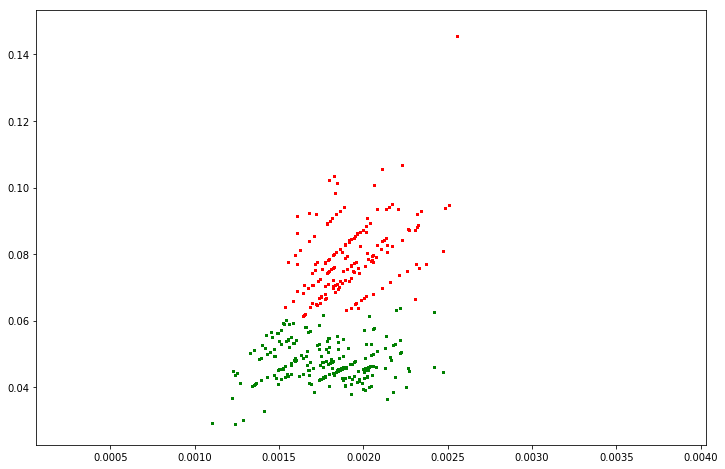

In [311]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots(figsize=(12,8))
# c = np.array([3,3])

for i in labels:
        points = np.array(X_df.loc[X_df['group'] == i])
        #c[i] = np.mean(points, axis=0)
        ax.scatter(points[:, 0], points[:, 1], s=3,  c=colors[i])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B8D231C908>,
      dtype=object)

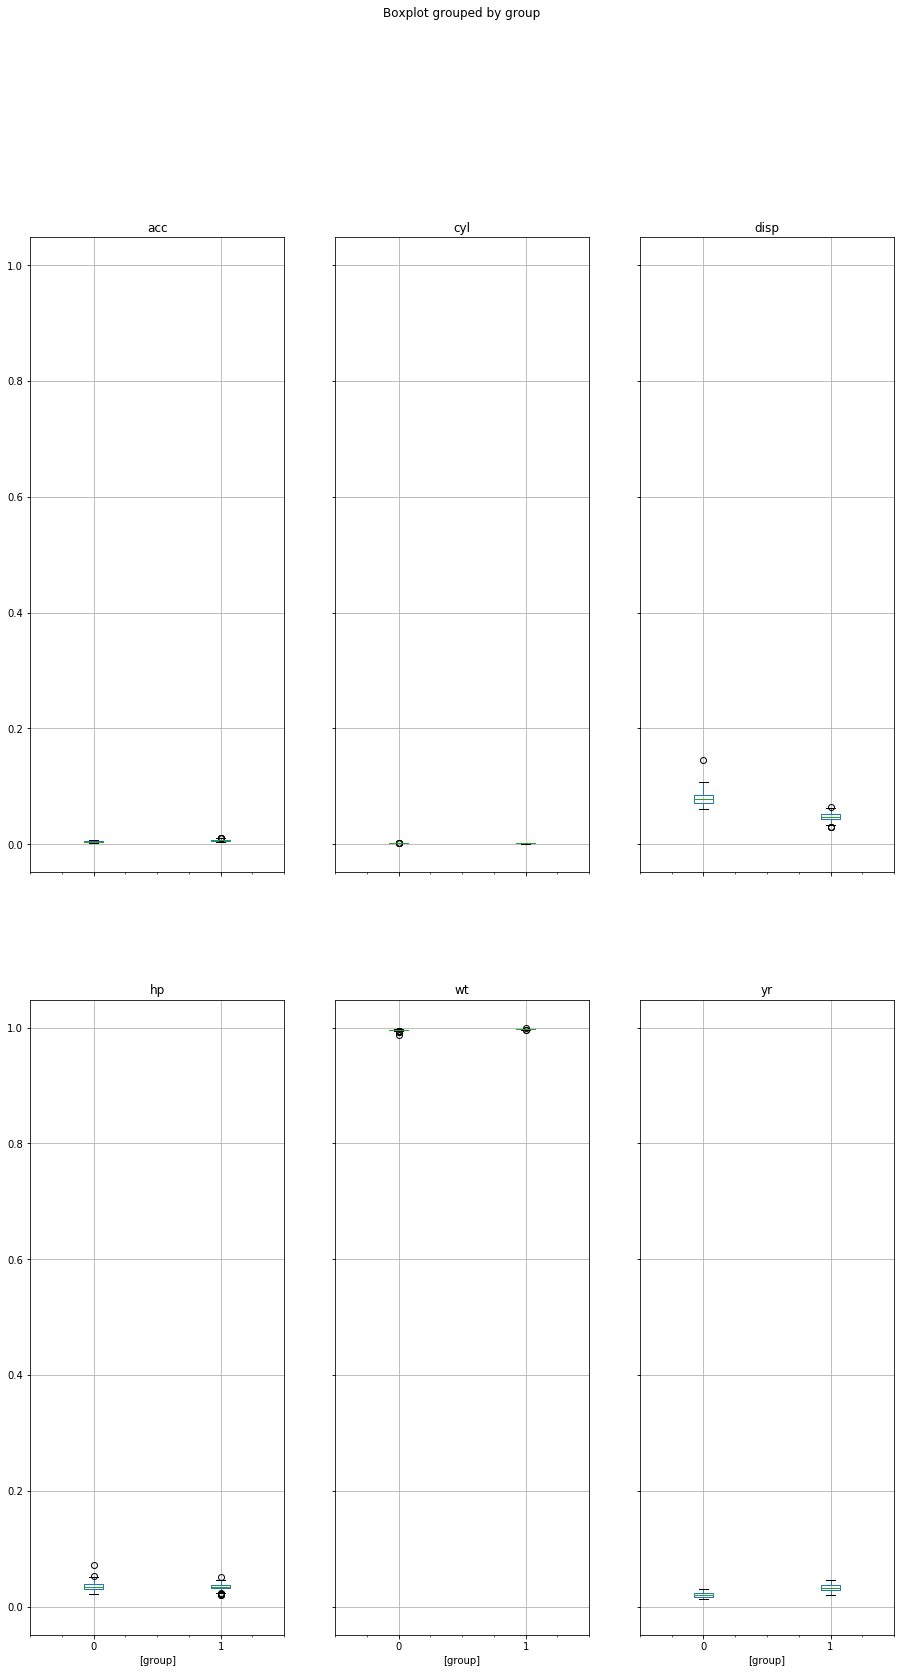

In [312]:
import matplotlib.pylab as plt
X_df.boxplot(by = 'group',  layout=(3,3), figsize=(15, 40))

### Preparation for Linear Regression model

In [313]:
X_df2 = X_df.copy()
X_df2.head()

,cyl,disp,hp,wt,acc,yr,group
0,0.002272,0.087201,0.036926,0.995286,0.003409,0.019883,0
1,0.002154,0.094240,0.044427,0.994364,0.003096,0.018848,0
2,0.002316,0.092048,0.043419,0.994580,0.003184,0.020262,0
3,0.002319,0.088104,0.043472,0.994936,0.003478,0.020287,0
4,0.002308,0.087137,0.040395,0.995153,0.003030,0.020197,0


In [314]:
X_df2.drop(["disp","hp","wt","acc","yr"],axis=1, inplace = True)
X_df2.head()

,cyl,group
0,0.002272,0
1,0.002154,0
2,0.002316,0
3,0.002319,0
4,0.002308,0


In [315]:
df = pd.merge(X, X_df2, how = "left",on = "cyl")
df.head()

,cyl,disp,hp,wt,acc,yr,mpg,group
0,0.002272,0.087201,0.036926,0.995286,0.003409,0.019883,0.005113,0
1,0.002154,0.094240,0.044427,0.994364,0.003096,0.018848,0.004039,0
2,0.002316,0.092048,0.043419,0.994580,0.003184,0.020262,0.005210,0
3,0.002319,0.088104,0.043472,0.994936,0.003478,0.020287,0.004637,0
4,0.002308,0.087137,0.040395,0.995153,0.003030,0.020197,0.004905,0


In [316]:
# mask = df['group'] = 0
df1 = df[df['group'] == 0]
df2 = df[df['group'] == 1]
df1.head()

,cyl,disp,hp,wt,acc,yr,mpg,group
0,0.002272,0.087201,0.036926,0.995286,0.003409,0.019883,0.005113,0
1,0.002154,0.094240,0.044427,0.994364,0.003096,0.018848,0.004039,0
2,0.002316,0.092048,0.043419,0.994580,0.003184,0.020262,0.005210,0
3,0.002319,0.088104,0.043472,0.994936,0.003478,0.020287,0.004637,0
4,0.002308,0.087137,0.040395,0.995153,0.003030,0.020197,0.004905,0


In [317]:
df2.head()

,cyl,disp,hp,wt,acc,yr,mpg,group
14,0.001682,0.047523,0.039953,0.997564,0.006308,0.029439,0.010093,1
18,0.001873,0.045425,0.041210,0.997474,0.006790,0.032781,0.012644,1
19,0.002174,0.052724,0.025003,0.997406,0.011143,0.038048,0.014132,1
20,0.001494,0.041094,0.032502,0.998218,0.006538,0.026151,0.009340,1
21,0.001643,0.043939,0.036958,0.997869,0.005954,0.028745,0.009855,1


### Linear Regression

#### Cluster 1 data

In [323]:
df1.shape

(169, 9)

In [ ]:
# Drop group column from df1 now

In [324]:
df1 = df1.drop(columns = 'group',axis = 1 )

In [325]:
df1.shape

(169, 8)

## Separate features and target attribute

In [265]:
# (Target-set)
y = df1['mpg']
# (Feature-set)
X = df1.drop('mpg' , axis = 1)

In [266]:
X.shape

(223, 6)

In [267]:
y.shape

(223,)

### Training and testing data split

In [268]:
from sklearn.model_selection import train_test_split
test_size = 0.30 # taking 70:30 training and test set
seed = 11 # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [269]:
X_train.shape

(156, 6)

In [270]:
X_test.shape

(67, 6)

In [271]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
scaledX_train = sc.transform(X_train)
scaledX_test = sc.transform(X_test)

## LogisticRegression Model

In [331]:
# # Fit the model
# from sklearn.linear_model import LogisticRegression
# model = LogisticRegression()
# model.fit(scaledX_train, y_train)

## Note:  mpg is continuos variable. Need to be encoded .

In [ ]:
#Calculate the coefficients of logistic regression model
t = list(X_train.columns)
coef_df = pd.DataFrame(model.coef_, columns= t)
coef_df['intercept'] = model.intercept_
print(coef_df)